## BE de detection d'anomalies


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/dataset.csv')
data

,day_cycle_window,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
0,1_1_1,-0.805191,-1.141993,-1.328327,-1.516693,-1.373962,-0.808270,-1.070547,-0.504352,2.807146,0.495528,-1.246737
1,1_1_1,-0.805191,-1.134902,-1.320393,-1.505848,-1.361560,-0.807840,-1.064212,-0.516000,2.894177,0.494467,-1.244472
2,1_1_1,-0.805191,-1.117304,-1.307167,-1.505848,-1.361560,-0.807840,-1.064212,-0.516000,2.981904,0.429370,-1.244472
3,1_1_1,-0.814231,-1.114206,-1.287593,-1.442302,-1.287565,-0.807840,-1.045557,-0.516000,3.063298,0.348056,-1.244472
4,1_1_1,-0.848104,-1.112276,-1.285393,-1.429076,-1.270722,-0.807840,-1.017575,-0.664906,3.049237,0.118828,-1.270237
...,...,...,...,...,...,...,...,...,...,...,...,...
162697,4_4_160,0.147741,0.060913,0.185874,-0.163053,-0.284814,0.150407,0.029841,0.111318,-1.663704,0.614371,0.432218
162698,4_4_160,0.147741,0.060913,0.185874,-0.163053,-0.284814,0.177867,0.029841,0.113368,-1.663704,0.614371,0.432218
162699,4_4_160,0.147741,0.060913,0.185874,-0.163053,-0.284814,0.179901,0.029841,0.113368,-1.663704,0.614371,0.432218
162700,4_4_160,0.147741,0.060913,0.185874,-0.163053,-0.232045,0.179901,0.029841,0.113368,-1.663704,0.614371,0.432218


In [3]:
data.describe()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
count,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000
mean,0.000009,0.000011,0.000031,0.000005,0.000016,-0.000005,-0.000002,0.000003,-0.000021,0.000026,0.000030
std,0.999950,0.999925,0.999961,0.999925,0.999963,0.999926,0.999950,0.999949,0.997770,0.999686,0.999847
min,-3.211980,-3.395387,-3.325651,-3.378450,-3.281286,-4.200181,-3.898025,-3.524957,-13.704556,-12.044778,-3.183571
25%,-0.678808,-0.482716,-0.629123,-0.491585,-0.612334,-0.559023,-0.606135,-0.736398,-0.593096,-0.498480,-0.658530
50%,0.041883,0.180361,0.041442,0.147397,0.117040,0.153972,0.186038,-0.012354,-0.034882,-0.257635,-0.015437
75%,0.743973,0.656920,0.659246,0.636887,0.712393,0.685353,0.718237,0.802395,0.508232,0.359773,0.636740
max,5.013899,6.260782,8.652950,8.359670,6.424227,5.638259,3.735957,4.667058,8.203706,5.597387,9.204384


In [4]:
def day_cycle_window(txt):
    res = txt.split('_')
    return([int(res[0]),int(res[1]),int(res[2])])

In [5]:
day_cycle_window("1_2_3")[0]

1

In [6]:
data.corr()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
p1,1.000000,0.743804,0.565838,0.645121,0.624481,0.613244,0.639742,0.560869,-0.503502,-0.163234,0.563531
p2,0.743804,1.000000,0.682531,0.772694,0.752933,0.722363,0.775408,0.678819,-0.567669,-0.192766,0.650339
p3,0.565838,0.682531,1.000000,0.675952,0.668370,0.583064,0.517204,0.579898,-0.605091,0.110260,0.918913
p4,0.645121,0.772694,0.675952,1.000000,0.744707,0.740058,0.699865,0.575245,-0.607031,-0.212327,0.623993
p5,0.624481,0.752933,0.668370,0.744707,1.000000,0.669007,0.717467,0.624363,-0.574300,-0.115710,0.627748
p6,0.613244,0.722363,0.583064,0.740058,0.669007,1.000000,0.759859,0.635648,-0.547077,-0.249565,0.534820
p7,0.639742,0.775408,0.517204,0.699865,0.717467,0.759859,1.000000,0.668587,-0.532341,-0.309137,0.497391
p8,0.560869,0.678819,0.579898,0.575245,0.624363,0.635648,0.668587,1.000000,-0.510558,-0.136902,0.595250
p9,-0.503502,-0.567669,-0.605091,-0.607031,-0.574300,-0.547077,-0.532341,-0.510558,1.000000,0.079156,-0.630761
p10,-0.163234,-0.192766,0.110260,-0.212327,-0.115710,-0.249565,-0.309137,-0.136902,0.079156,1.000000,0.202441


Text(0, 0.5, 'p11')

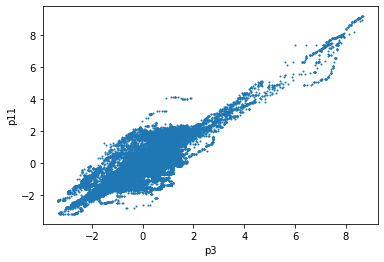

In [73]:
plt.scatter(data['p3'],data['p11'],s=1)
plt.xlabel('p3')
plt.ylabel('p11')

In [76]:
data.columns

Index(['day_cycle_window', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8',
       'p9', 'p10', 'p11'],
      dtype='object')

,day_cycle_window,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
27681,1_5_8,0.828270,0.841932,0.830828,0.834478,0.813153,0.826365,0.833092,0.833387,-0.657785,-0.512965,0.842511
27682,1_5_8,0.828270,0.841932,0.830828,0.834478,0.813153,0.826365,0.833092,0.833387,-0.657785,-0.524499,0.842511
27683,1_5_8,0.828270,0.841932,0.830828,0.834478,0.813153,0.826365,0.833092,0.833387,-0.657785,-0.525386,0.842511
27684,1_5_8,0.828270,0.841932,0.830828,0.834478,0.813153,0.826365,0.833092,0.833387,-0.657785,-0.525386,0.842511
27685,1_5_8,0.828270,0.841932,0.830828,0.834478,0.813153,0.826365,0.833092,0.833387,-0.657785,-0.525386,0.842511
...,...,...,...,...,...,...,...,...,...,...,...,...
27776,1_5_8,0.842355,0.853239,0.845005,0.848935,0.828701,0.841649,0.845445,0.846607,-0.657785,-0.523543,0.855675
27777,1_5_8,0.842592,0.853285,0.845403,0.849167,0.828751,0.841855,0.845656,0.846714,-0.657785,-0.518634,0.855675
27778,1_5_8,0.842592,0.853285,0.845403,0.849167,0.828751,0.841855,0.845656,0.846714,-0.657785,-0.524558,0.855675
27779,1_5_8,0.842592,0.853285,0.845403,0.849167,0.828751,0.841855,0.845656,0.846714,-0.657785,-0.524558,0.855675


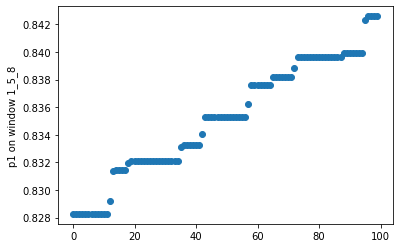

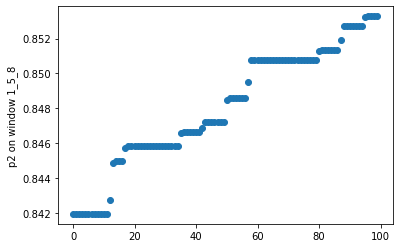

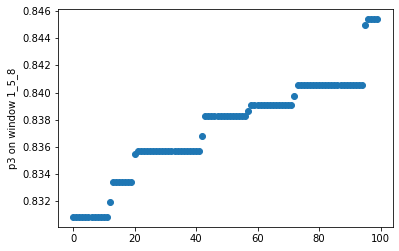

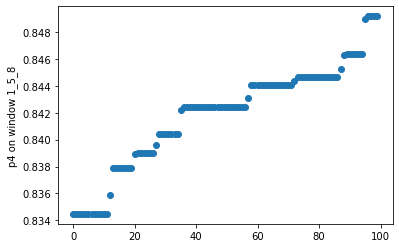

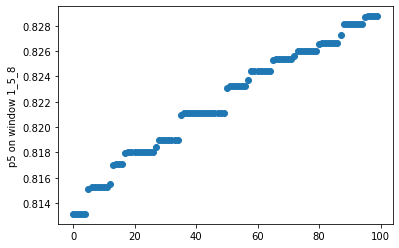

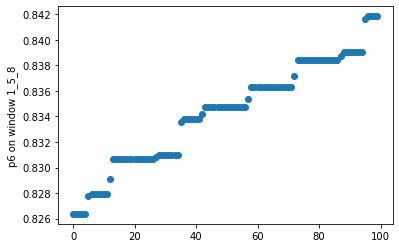

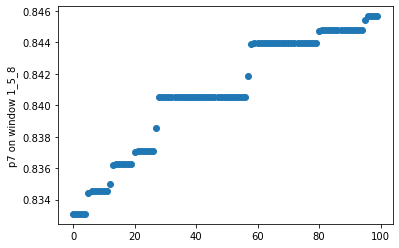

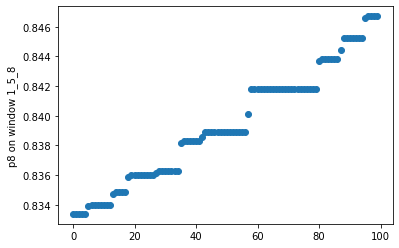

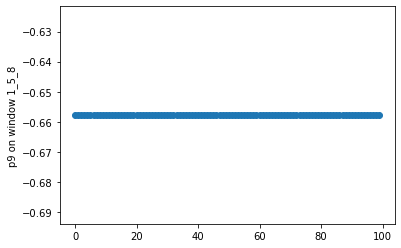

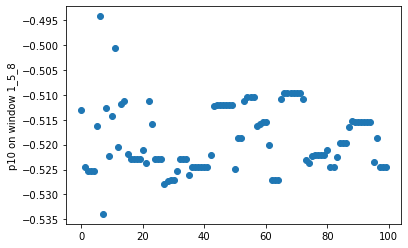

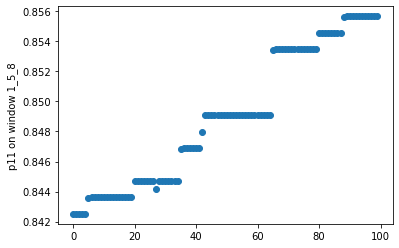

In [79]:
#Representation d'une variable sur un cycle
window = '1_5_8'
fenetre = data[data['day_cycle_window']==window]
var = data.columns
nVar = len(var)
for i in range(1,nVar): #we don't take day_cycle_window
    y = fenetre[var[i]]
    x = np.arange(0,len(y))
    plt.figure()
    plt.scatter(x,y)
    plt.ylabel(var[i] + " on window " + window)
#fenetre

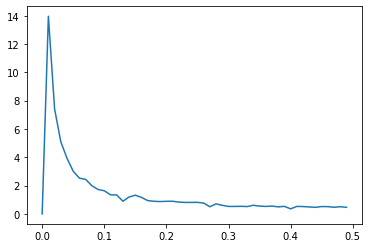

In [151]:
window = '1_1_6'
var = 'p1'
dt = 1 #sample real frequency
fe = 1/dt
fenetre = data[data['day_cycle_window']==window]
y = fenetre[var]
y=y-np.mean(y) #we withdraw the constant component
tf = abs(np.fft.fft(y))
n = y.size
freq = np.arange(0,n)/n*fe
plt.plot(freq[0:n//2],tf[0:n//2])


1.0

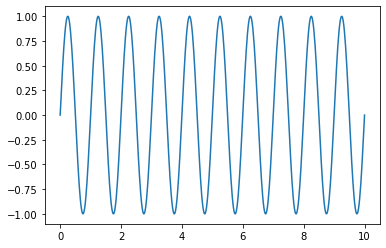

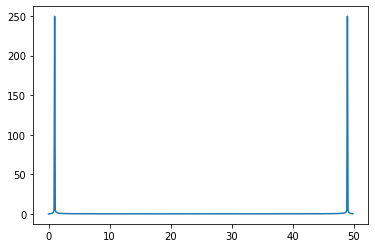

In [142]:
N = 500
a = 0
b = 10
t = np.linspace(a,b,N)
dt = (b-a)/N
fe = 1/dt
f = 1
y = np.sin(2*np.pi*f*t)
plt.figure()
plt.plot(t,y)
tf = np.abs(np.fft.fft(y))
freq = np.arange(0,N)/N*fe
plt.figure()
plt.plot(freq,tf)
i = np.argmax(tf)
freq[i]

In [31]:
#decrire des features sur chaque variable (moyenne, ecart type,....)
#sur chaque variable, on prend la moyenne par fenêtre
mean_data = data.groupby(by='day_cycle_window').mean()
mean_data

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
day_cycle_window,,,,,,,,,,,
1_1_1,-1.926141,-2.456284,-2.487394,-2.481230,-2.388674,-1.984092,-2.447148,-1.169837,2.848242,-1.370045,-2.500060
1_1_10,1.204735,1.123558,1.077596,1.128253,1.136183,1.228688,1.199106,1.308412,-0.429810,-0.088168,1.016565
1_1_11,0.742475,0.703459,0.680578,0.740626,0.768269,0.736631,0.755362,0.783155,-0.429810,-0.091129,0.669938
1_1_12,0.300162,0.289058,0.289114,0.342999,0.396993,0.254292,0.324268,0.264819,-0.429810,-0.085217,0.303699
1_1_13,0.140935,0.152487,0.161874,0.200016,0.226986,0.083547,0.170042,0.068720,-0.429810,-0.089727,0.186059
...,...,...,...,...,...,...,...,...,...,...,...
4_4_95,-0.372836,0.141482,-0.149731,0.024193,0.623414,0.574988,-0.137674,-0.985834,0.935814,0.716441,-0.683516
4_4_96,-0.422993,0.074675,-0.178621,-0.197507,0.619532,0.805870,0.327148,-1.005362,0.924742,0.226022,-0.722753
4_4_97,-0.453629,0.040768,-0.130621,-0.370856,0.415872,0.808718,0.620583,-0.986663,0.905289,0.171044,-0.741979


In [29]:
#ACP la dessus
from sklearn.decomposition import PCA
acp = PCA(n_components=11,svd_solver='full')
acp.fit(mean_data)
acp.explained_variance_ratio_

array([0.62906609, 0.12725862, 0.04539754, 0.04342628, 0.03657464,
       0.03225765, 0.02769817, 0.0209818 , 0.01837911, 0.01423389,
       0.00472622])

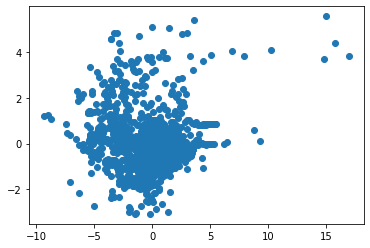

In [30]:
X_ppal=acp.components_[0]
Y_ppal= acp.components_[1]
plt.scatter(np.dot(mean_data,X_ppal),np.dot(mean_data,Y_ppal)) #a verifier groooos voir TP avec R

In [45]:
#idees, faire de meme avec les coeff de fourier des variables, l'écart type etcc

In [72]:
data.columns()

TypeError: 'Index' object is not callable